In [ ]:
# Required Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
import graphviz 
from sklearn import tree
from sklearn.tree import export_graphviz
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  
%matplotlib inline

In [ ]:
# setting parameters for visualization
# sizing the plots
plt.rcParams['figure.figsize'] = [12,6]
plt.style.use('fivethirtyeight')

# ignoring all warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [ ]:
# reading TRI Data
TRI_data = pd.read_csv('/content/drive/MyDrive/NSM_ANALYTICS/TRI_2019_us.csv')

In [ ]:
# rename the columns
TRI_data.rename(columns={'9. ZIP': 'ZIPCODE'}, inplace=True)
TRI_data.rename(columns={'37. CAS#': 'CAS_NUM'}, inplace=True)

In [ ]:
# only fetching the data from GA
GA_TRI_data = TRI_data[TRI_data['8. ST'] == 'GA'].reset_index(drop=True)

In [ ]:
# Resizing the ZIPCODE to 5 digits
GA_TRI_data['ZIPCODE'] = [int(str(e)[:5]) for e in GA_TRI_data['ZIPCODE']]

In [ ]:
# shape of the data
GA_TRI_data.shape

(2289, 119)

In [ ]:
GA_TRI_data['ZIPCODE'].nunique()

294

In [ ]:
GA_TRI_data.head(1)

,1. YEAR,2. TRIFD,3. FRS ID,4. FACILITY NAME,5. STREET ADDRESS,6. CITY,7. COUNTY,8. ST,ZIPCODE,10. BIA,11. TRIBE,12. LATITUDE,13. LONGITUDE,14. HORIZONTAL DATUM,15. PARENT CO NAME,16. PARENT CO DB NUM,17. STANDARD PARENT CO NAME,18. FEDERAL FACILITY,19. INDUSTRY SECTOR CODE,20. INDUSTRY SECTOR,21. PRIMARY SIC,22. SIC 2,23. SIC 3,24. SIC 4,25. SIC 5,26. SIC 6,27. PRIMARY NAICS,28. NAICS 2,29. NAICS 3,30. NAICS 4,31. NAICS 5,32. NAICS 6,33. DOC_CTRL_NUM,34. CHEMICAL,35. ELEMENTAL METAL INCLUDED,36. TRI CHEMICAL/COMPOUND ID,CAS_NUM,38. SRS ID,39. CLEAN AIR ACT CHEMICAL,40. CLASSIFICATION,41. METAL,42. METAL CATEGORY,43. CARCINOGEN,44. PBT,45. PFAS,46. FORM TYPE,47. UNIT OF MEASURE,48. 5.1 - FUGITIVE AIR,49. 5.2 - STACK AIR,50. 5.3 - WATER,51. 5.4 - UNDERGROUND,52. 5.4.1 - UNDERGROUND CL I,53. 5.4.2 - UNDERGROUND C II-V,54. 5.5.1 - LANDFILLS,55. 5.5.1A - RCRA C LANDFILL,56. 5.5.1B - OTHER LANDFILLS,57. 5.5.2 - LAND TREATMENT,58. 5.5.3 - SURFACE IMPNDMNT,59. 5.5.3A - RCRA SURFACE IM,60. 5.5.3B - OTHER SURFACE I,61. 5.5.4 - OTHER DISPOSAL,62. ON-SITE RELEASE TOTAL,63. 6.1 - POTW - TRNS RLSE,64. 6.1 - POTW - TRNS TRT,65. POTW - TOTAL TRANSFERS,66. 6.2 - M10,67. 6.2 - M41,68. 6.2 - M62,69. 6.2 - M40 METAL,70. 6.2 - M61 METAL,71. 6.2 - M71,72. 6.2 - M81,73. 6.2 - M82,74. 6.2 - M72,75. 6.2 - M63,76. 6.2 - M66,77. 6.2 - M67,78. 6.2 - M64,79. 6.2 - M65,80. 6.2 - M73,81. 6.2 - M79,82. 6.2 - M90,83. 6.2 - M94,84. 6.2 - M99,85. OFF-SITE RELEASE TOTAL,86. 6.2 - M20,87. 6.2 - M24,88. 6.2 - M26,89. 6.2 - M28,90. 6.2 - M93,91. OFF-SITE RECYCLED TOTAL,92. 6.2 - M56,93. 6.2 - M92,94. OFF-SITE ENERGY RECOVERY T,95. 6.2 - M40 NON-METAL,96. 6.2 - M50,97. 6.2 - M54,98. 6.2 - M61 NON-METAL,99. 6.2 - M69,100. 6.2 - M95,101. OFF-SITE TREATED TOTAL,102. 6.2 - UNCLASSIFIED,103. 6.2 - TOTAL TRANSFER,104. TOTAL RELEASES,105. 8.1 - RELEASES,106. 8.1A - ON-SITE CONTAINED,107. 8.1B - ON-SITE OTHER,108. 8.1C - OFF-SITE CONTAIN,109. 8.1D - OFF-SITE OTHER R,110. 8.2 - ENERGY RECOVER ON,111. 8.3 - ENERGY RECOVER OF,112. 8.4 - RECYCLING ON SITE,113. 8.5 - RECYCLING OFF SIT,114. 8.6 - TREATMENT ON SITE,115. 8.7 - TREATMENT OFF SITE,116. PRODUCTION WSTE (8.1-8.7),117. 8.8 - ONE-TIME RELEASE,118. PROD_RATIO_OR_ ACTIVITY,119. 8.9 - PRODUCTION RATIO
0,2019,31408NTRCT115EL,110000360467,JOHNSON MATTHEY PROCESS TECHNOLOGIES INC,115 ELI WHITNEY BLVD,SAVANNAH,CHATHAM,GA,31408,NaN,NaN,32.1151,-81.2204,NAD83,JOHNSON MATTHEY INC,002326734,JOHNSON MATTHEY HOLDINGS INC,NO,325,Chemicals,NaN,NaN,NaN,NaN,NaN,NaN,325180,NaN,NaN,NaN,NaN,NaN,1319218271296,Vanadium compounds,NO,N770,N770,755389.0,NO,TRI,YES,1,NO,NO,NO,R,Pounds,0.0,39.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,669.0,0.0,0.0,669.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,669.0,40.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,4998.0,669.0,0.0,0.0,5707.0,NaN,ACTIVITY,0.6


In [ ]:
GA_TRI_df = GA_TRI_data[['ZIPCODE', '48. 5.1 - FUGITIVE AIR', '49. 5.2 - STACK AIR', '40. CLASSIFICATION',
                         '41. METAL', '42. METAL CATEGORY', '43. CARCINOGEN', '44. PBT', '45. PFAS', '46. FORM TYPE', 
                         '20. INDUSTRY SECTOR', '35. ELEMENTAL METAL INCLUDED', '39. CLEAN AIR ACT CHEMICAL']]

In [ ]:
GA_TRI_df.shape

(2289, 13)

In [ ]:
GA_TRI_df.head(3)

,ZIPCODE,48. 5.1 - FUGITIVE AIR,49. 5.2 - STACK AIR,40. CLASSIFICATION,41. METAL,42. METAL CATEGORY,43. CARCINOGEN,44. PBT,45. PFAS,46. FORM TYPE,20. INDUSTRY SECTOR,35. ELEMENTAL METAL INCLUDED,39. CLEAN AIR ACT CHEMICAL
0,31408,0.0,39.0,TRI,YES,1,NO,NO,NO,R,Chemicals,NO,NO
1,31323,0.0,6300.0,TRI,NO,0,YES,NO,NO,R,Chemicals,NO,YES
2,30260,0.0,0.0,PBT,YES,1,YES,YES,NO,R,Chemicals,NO,NO


In [ ]:
GA_TRI_df.isnull().sum().sum()

0

In [ ]:
GA_TRI_df.groupby(['39. CLEAN AIR ACT CHEMICAL'])['39. CLEAN AIR ACT CHEMICAL'].count()

39. CLEAN AIR ACT CHEMICAL
NO      963
YES    1326
Name: 39. CLEAN AIR ACT CHEMICAL, dtype: int64

In [ ]:
GA_TRI_df.groupby(['35. ELEMENTAL METAL INCLUDED'])['35. ELEMENTAL METAL INCLUDED'].count()

35. ELEMENTAL METAL INCLUDED
NO     2135
YES     154
Name: 35. ELEMENTAL METAL INCLUDED, dtype: int64

In [ ]:
GA_TRI_df.groupby(['46. FORM TYPE'])['46. FORM TYPE'].count()

46. FORM TYPE
A     435
R    1854
Name: 46. FORM TYPE, dtype: int64

In [ ]:
GA_TRI_df.groupby(['43. CARCINOGEN'])['43. CARCINOGEN'].count()

43. CARCINOGEN
NO     1747
YES     542
Name: 43. CARCINOGEN, dtype: int64

In [ ]:
GA_TRI_df.groupby(['44. PBT'])['44. PBT'].count()

44. PBT
NO     1918
YES     371
Name: 44. PBT, dtype: int64

In [ ]:
GA_TRI_df.groupby(['41. METAL'])['41. METAL'].count()

41. METAL
NO     1443
YES     846
Name: 41. METAL, dtype: int64

In [ ]:
GA_TRI_df['39. CLEAN AIR ACT CHEMICAL'] = [1 if e == 'YES' else 0 for e in GA_TRI_df['39. CLEAN AIR ACT CHEMICAL']]
GA_TRI_df['35. ELEMENTAL METAL INCLUDED'] = [1 if e == 'YES' else 0 for e in GA_TRI_df['35. ELEMENTAL METAL INCLUDED']]
GA_TRI_df['43. CARCINOGEN'] = [1 if e == 'YES' else 0 for e in GA_TRI_df['43. CARCINOGEN']]
GA_TRI_df['44. PBT'] = [1 if e == 'YES' else 0 for e in GA_TRI_df['44. PBT']]
GA_TRI_df['41. METAL'] = [1 if e == 'YES' else 0 for e in GA_TRI_df['41. METAL']]
GA_TRI_df['46. FORM TYPE'] = [1 if e == 'A' else 0 for e in GA_TRI_df['46. FORM TYPE']]

In [ ]:
GA_TRI_df.drop(columns=['45. PFAS'], axis=1, inplace=True)

In [ ]:
GA_TRI_df.head()

,ZIPCODE,48. 5.1 - FUGITIVE AIR,49. 5.2 - STACK AIR,40. CLASSIFICATION,41. METAL,42. METAL CATEGORY,43. CARCINOGEN,44. PBT,46. FORM TYPE,20. INDUSTRY SECTOR,35. ELEMENTAL METAL INCLUDED,39. CLEAN AIR ACT CHEMICAL
0,31408,0.0000,39.0,TRI,1,1,0,0,0,Chemicals,0,0
1,31323,0.0000,6300.0,TRI,0,0,1,0,0,Chemicals,0,1
2,30260,0.0000,0.0,PBT,1,1,1,1,0,Chemicals,0,0
3,30720,14.0000,1358.0,TRI,0,0,0,0,0,Textile Product,0,0
4,30340,5.3419,0.0,TRI,0,0,0,0,0,Chemical Wholesalers,0,1


In [ ]:
# GA_TRI_df.groupby(['45. PFAS'])['45. PFAS'].count()

In [ ]:
GA_TRI_df.groupby(['42. METAL CATEGORY'])['42. METAL CATEGORY'].count()

42. METAL CATEGORY
0    1383
1     846
2      21
3      23
4      16
Name: 42. METAL CATEGORY, dtype: int64

In [ ]:
GA_TRI_df.groupby(['40. CLASSIFICATION'])['40. CLASSIFICATION'].count()

40. CLASSIFICATION
Dioxin      33
PBT        338
TRI       1918
Name: 40. CLASSIFICATION, dtype: int64

In [ ]:
GA_TRI_df.describe()

,ZIPCODE,48. 5.1 - FUGITIVE AIR,49. 5.2 - STACK AIR,41. METAL,42. METAL CATEGORY,43. CARCINOGEN,44. PBT,46. FORM TYPE,35. ELEMENTAL METAL INCLUDED,39. CLEAN AIR ACT CHEMICAL
count,2289.000000,2.289000e+03,2.289000e+03,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000
mean,30943.391437,3.417876e+03,1.082080e+04,0.369594,0.446046,0.236785,0.162080,0.190039,0.067278,0.579292
std,1471.435349,4.196062e+04,1.186831e+05,0.482800,0.640144,0.425202,0.368604,0.392418,0.250558,0.493781
min,30001.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30217.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30650.000000,0.000000e+00,1.600000e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,31322.000000,8.000000e+00,1.170000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,39851.000000,1.209843e+06,3.758763e+06,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
GA_TRI_df['48. 5.1 - FUGITIVE AIR'] = [1 if e >= 8 else 0 for e in GA_TRI_df['48. 5.1 - FUGITIVE AIR']]
GA_TRI_df['49. 5.2 - STACK AIR'] = [1 if e >= 117 else 0 for e in GA_TRI_df['49. 5.2 - STACK AIR']]

In [ ]:
GA_TRI_df['42. METAL CATEGORY'] = [1 if e >= 1 else 0 for e in GA_TRI_df['42. METAL CATEGORY']]

In [ ]:
GA_TRI_df['42. METAL CATEGORY'].value_counts()

0    1383
1     906
Name: 42. METAL CATEGORY, dtype: int64

In [ ]:
GA_TRI_df.groupby(['20. INDUSTRY SECTOR'])['20. INDUSTRY SECTOR'].count()

20. INDUSTRY SECTOR
Apparel                                2
Beverages                              4
Chemical Wholesalers                  75
Chemicals                            660
Computers and Electronic Products      8
Electric Utilities                    69
Electrical Equipment                  55
Fabricated Metals                    118
Food                                 148
Furniture                              3
Hazardous Waste                        8
Machinery                             91
Metal Mining                           3
Miscellaneous Manufacturing           28
Nonmetallic Mineral Product          141
Other                                 51
Paper                                225
Petroleum                             39
Petroleum Bulk Terminals              92
Plastics and Rubber                   81
Primary Metals                       101
Printing                               2
Textile Product                       26
Textiles                             

In [ ]:
GA_TRI_df['INDUSTRY SECTOR'] = ['Hazardous Waste' if e == 'Hazardous Waste' else 'Chemicals' if e in ['Chemicals', 'Chemical Wholesalers'] else 'Petroleums' if e in ['Petroleum', 'Petroleum Bulk Terminals', 'Plastics and Rubber'] else 'Others' for e in GA_TRI_df['20. INDUSTRY SECTOR']]

In [ ]:
GA_TRI_df.drop(columns=['20. INDUSTRY SECTOR'], axis=1, inplace=True)

In [ ]:
GA_TRI_df.head()

,ZIPCODE,48. 5.1 - FUGITIVE AIR,49. 5.2 - STACK AIR,40. CLASSIFICATION,41. METAL,42. METAL CATEGORY,43. CARCINOGEN,44. PBT,46. FORM TYPE,35. ELEMENTAL METAL INCLUDED,39. CLEAN AIR ACT CHEMICAL,INDUSTRY SECTOR
0,31408,0,0,TRI,1,1,0,0,0,0,0,Chemicals
1,31323,0,1,TRI,0,0,1,0,0,0,1,Chemicals
2,30260,0,0,PBT,1,1,1,1,0,0,0,Chemicals
3,30720,1,1,TRI,0,0,0,0,0,0,0,Others
4,30340,0,0,TRI,0,0,0,0,0,0,1,Chemicals


In [ ]:
GA_TRI_df['INDUSTRY SECTOR'].value_counts()

Others             1334
Chemicals           735
Petroleums          212
Hazardous Waste       8
Name: INDUSTRY SECTOR, dtype: int64

In [ ]:
# Reading SDOH data
SDOH = pd.read_csv('/content/drive/MyDrive/NSM_ANALYTICS/sdoh.csv')

In [ ]:
# slicing of the ZIPCODE to 5 digits
SDOH['ZIPCODE'] = [int(str(e)[:5]) for e in SDOH['ZIPCODE']]

In [ ]:
GA_SDOH = SDOH[SDOH['STATE'] == 'Georgia'].reset_index(drop=True)

In [ ]:
GA_SDOH.shape

(951, 355)

In [ ]:
GA_SDOH_df = GA_SDOH[['ZIPCODE', 'CDCP_ARTHRITIS_ADULT_C_ZC', 'CDCP_ASTHMA_ADULT_C_ZC', 'CDCP_BLOOD_MED_ADULT_C_ZC', 'CDCP_CHOLES_ADULT_C_ZC',
     'CDCP_KIDNEY_DISEASE_ADULT_C_ZC', 'CDCP_PULMONARY_ADULT_C_ZC', 'CDCP_DOCTOR_VISIT_ADULT_C_ZC']]

In [ ]:
GA_SDOH_df.dropna(inplace=True)

In [ ]:
GA_SDOH_df.isnull().sum()

ZIPCODE                           0
CDCP_ARTHRITIS_ADULT_C_ZC         0
CDCP_ASTHMA_ADULT_C_ZC            0
CDCP_BLOOD_MED_ADULT_C_ZC         0
CDCP_CHOLES_ADULT_C_ZC            0
CDCP_KIDNEY_DISEASE_ADULT_C_ZC    0
CDCP_PULMONARY_ADULT_C_ZC         0
CDCP_DOCTOR_VISIT_ADULT_C_ZC      0
dtype: int64

In [ ]:
GA_SDOH_df.head()

,ZIPCODE,CDCP_ARTHRITIS_ADULT_C_ZC,CDCP_ASTHMA_ADULT_C_ZC,CDCP_BLOOD_MED_ADULT_C_ZC,CDCP_CHOLES_ADULT_C_ZC,CDCP_KIDNEY_DISEASE_ADULT_C_ZC,CDCP_PULMONARY_ADULT_C_ZC,CDCP_DOCTOR_VISIT_ADULT_C_ZC
1,30002,22.5,9.1,73.4,30.5,2.9,6.1,74.5
2,30004,18.4,7.6,70.3,30.2,2.0,4.1,75.4
3,30023,17.0,7.2,68.8,29.1,1.8,3.6,75.4
4,30005,17.0,7.2,68.8,29.1,1.8,3.6,75.4
5,30008,20.0,9.9,68.9,27.2,3.0,6.7,76.4


In [ ]:
GA_SDOH_df.shape

(948, 8)

In [ ]:
GA_SDOH_df[['CDCP_ARTHRITIS_ADULT_C_ZC', 'CDCP_ASTHMA_ADULT_C_ZC', 'CDCP_BLOOD_MED_ADULT_C_ZC', 'CDCP_CHOLES_ADULT_C_ZC',
     'CDCP_KIDNEY_DISEASE_ADULT_C_ZC', 'CDCP_PULMONARY_ADULT_C_ZC', 'CDCP_DOCTOR_VISIT_ADULT_C_ZC']].describe()

,CDCP_ARTHRITIS_ADULT_C_ZC,CDCP_ASTHMA_ADULT_C_ZC,CDCP_BLOOD_MED_ADULT_C_ZC,CDCP_CHOLES_ADULT_C_ZC,CDCP_KIDNEY_DISEASE_ADULT_C_ZC,CDCP_PULMONARY_ADULT_C_ZC,CDCP_DOCTOR_VISIT_ADULT_C_ZC
count,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000
mean,26.072363,9.861392,73.661392,32.575316,3.346941,8.413608,76.778797
std,5.867750,1.115167,8.134764,5.192573,0.860381,2.513641,2.800197
min,3.800000,6.900000,16.300000,9.100000,0.700000,1.800000,63.700000
25%,23.000000,9.200000,72.300000,30.100000,2.800000,6.400000,75.300000
50%,27.050000,9.900000,75.000000,33.500000,3.300000,8.700000,76.900000
75%,30.100000,10.600000,77.700000,35.800000,3.900000,10.300000,78.600000
max,43.600000,15.000000,88.900000,47.800000,7.300000,16.500000,88.300000


In [ ]:
GA_SDOH_df['CDCP_ARTHRITIS_ADULT_C_ZC_CATG'] = [1 if e >= 30.1 else 0 for e in GA_SDOH_df['CDCP_ARTHRITIS_ADULT_C_ZC']]
GA_SDOH_df['CDCP_ASTHMA_ADULT_C_ZC_CATG'] = [1 if e >= 10.6 else 0 for e in GA_SDOH_df['CDCP_ASTHMA_ADULT_C_ZC']]
GA_SDOH_df['CDCP_BLOOD_MED_ADULT_C_ZC_CATG'] = [1 if e >= 77.7 else 0 for e in GA_SDOH_df['CDCP_BLOOD_MED_ADULT_C_ZC']]
GA_SDOH_df['CDCP_CHOLES_ADULT_C_ZC_CATG'] = [1 if e >= 35.8 else 0 for e in GA_SDOH_df['CDCP_CHOLES_ADULT_C_ZC']]
GA_SDOH_df['CDCP_KIDNEY_DISEASE_ADULT_C_ZC_CATG'] = [1 if e >= 3.9 else 0 for e in GA_SDOH_df['CDCP_KIDNEY_DISEASE_ADULT_C_ZC']]
GA_SDOH_df['CDCP_PULMONARY_ADULT_C_ZC_CATG'] = [1 if e >= 10.3 else 0 for e in GA_SDOH_df['CDCP_PULMONARY_ADULT_C_ZC']]
GA_SDOH_df['CDCP_DOCTOR_VISIT_ADULT_C_ZC_CATG'] = [1 if e >= 78.6 else 0 for e in GA_SDOH_df['CDCP_DOCTOR_VISIT_ADULT_C_ZC']]

In [ ]:
GA_SDOH_df.drop(columns=['CDCP_ARTHRITIS_ADULT_C_ZC', 'CDCP_ASTHMA_ADULT_C_ZC', 'CDCP_BLOOD_MED_ADULT_C_ZC', 'CDCP_CHOLES_ADULT_C_ZC',
                         'CDCP_KIDNEY_DISEASE_ADULT_C_ZC', 'CDCP_PULMONARY_ADULT_C_ZC', 'CDCP_DOCTOR_VISIT_ADULT_C_ZC'], 
                axis=1, inplace=True)

In [ ]:
GA_SDOH_df.head()

,ZIPCODE,CDCP_ARTHRITIS_ADULT_C_ZC_CATG,CDCP_ASTHMA_ADULT_C_ZC_CATG,CDCP_BLOOD_MED_ADULT_C_ZC_CATG,CDCP_CHOLES_ADULT_C_ZC_CATG,CDCP_KIDNEY_DISEASE_ADULT_C_ZC_CATG,CDCP_PULMONARY_ADULT_C_ZC_CATG,CDCP_DOCTOR_VISIT_ADULT_C_ZC_CATG
1,30002,0,0,0,0,0,0,0
2,30004,0,0,0,0,0,0,0
3,30023,0,0,0,0,0,0,0
4,30005,0,0,0,0,0,0,0
5,30008,0,0,0,0,0,0,0


In [ ]:
GA_SDOH_df['CDCP_DOCTOR_VISIT_ADULT_C_ZC_CATG'].value_counts()

0    705
1    243
Name: CDCP_DOCTOR_VISIT_ADULT_C_ZC_CATG, dtype: int64

In [ ]:
# 

In [ ]:
GA_SDOH_df['SUMMATION'] = GA_SDOH_df['CDCP_ARTHRITIS_ADULT_C_ZC_CATG'] + GA_SDOH_df['CDCP_ASTHMA_ADULT_C_ZC_CATG'] + GA_SDOH_df['CDCP_BLOOD_MED_ADULT_C_ZC_CATG'] + GA_SDOH_df['CDCP_CHOLES_ADULT_C_ZC_CATG'] + GA_SDOH_df['CDCP_KIDNEY_DISEASE_ADULT_C_ZC_CATG'] + GA_SDOH_df['CDCP_PULMONARY_ADULT_C_ZC_CATG'] + GA_SDOH_df['CDCP_DOCTOR_VISIT_ADULT_C_ZC_CATG']

In [ ]:
GA_SDOH_df['COMPOSITE_HEALTH_DETERIORATION'] = [1 if e >= 4 else 0 for e in GA_SDOH_df['SUMMATION']]

In [ ]:
GA_SDOH_df.drop(columns=['SUMMATION'], axis=1, inplace=True)

In [ ]:
GA_SDOH_df['COMPOSITE_HEALTH_DETERIORATION'].value_counts(normalize=True)

0    0.776371
1    0.223629
Name: COMPOSITE_HEALTH_DETERIORATION, dtype: float64

In [ ]:
GA_SDOH_df.head()

,ZIPCODE,CDCP_ARTHRITIS_ADULT_C_ZC_CATG,CDCP_ASTHMA_ADULT_C_ZC_CATG,CDCP_BLOOD_MED_ADULT_C_ZC_CATG,CDCP_CHOLES_ADULT_C_ZC_CATG,CDCP_KIDNEY_DISEASE_ADULT_C_ZC_CATG,CDCP_PULMONARY_ADULT_C_ZC_CATG,CDCP_DOCTOR_VISIT_ADULT_C_ZC_CATG,COMPOSITE_HEALTH_DETERIORATION
1,30002,0,0,0,0,0,0,0,0
2,30004,0,0,0,0,0,0,0,0
3,30023,0,0,0,0,0,0,0,0
4,30005,0,0,0,0,0,0,0,0
5,30008,0,0,0,0,0,0,0,0


In [ ]:
Req_GA_SDOH = GA_SDOH_df[['ZIPCODE', 'COMPOSITE_HEALTH_DETERIORATION']]

In [ ]:
Req_GA_SDOH.head()

,ZIPCODE,COMPOSITE_HEALTH_DETERIORATION
1,30002,0
2,30004,0
3,30023,0
4,30005,0
5,30008,0


In [ ]:
GA_TRI_df.head()

,ZIPCODE,48. 5.1 - FUGITIVE AIR,49. 5.2 - STACK AIR,40. CLASSIFICATION,41. METAL,42. METAL CATEGORY,43. CARCINOGEN,44. PBT,46. FORM TYPE,35. ELEMENTAL METAL INCLUDED,39. CLEAN AIR ACT CHEMICAL,INDUSTRY SECTOR
0,31408,0,0,TRI,1,1,0,0,0,0,0,Chemicals
1,31323,0,1,TRI,0,0,1,0,0,0,1,Chemicals
2,30260,0,0,PBT,1,1,1,1,0,0,0,Chemicals
3,30720,1,1,TRI,0,0,0,0,0,0,0,Others
4,30340,0,0,TRI,0,0,0,0,0,0,1,Chemicals


In [ ]:
Data = pd.merge(left=GA_TRI_df, right=Req_GA_SDOH, on='ZIPCODE', how='left')

In [ ]:
Data.isnull().sum()

ZIPCODE                           0
48. 5.1 - FUGITIVE AIR            0
49. 5.2 - STACK AIR               0
40. CLASSIFICATION                0
41. METAL                         0
42. METAL CATEGORY                0
43. CARCINOGEN                    0
44. PBT                           0
46. FORM TYPE                     0
35. ELEMENTAL METAL INCLUDED      0
39. CLEAN AIR ACT CHEMICAL        0
INDUSTRY SECTOR                   0
COMPOSITE_HEALTH_DETERIORATION    3
dtype: int64

In [ ]:
final_df = Data.dropna().reset_index(drop=True)

In [ ]:
final_df.shape

(2286, 13)

In [ ]:
final_df.isnull().sum().sum()

0

In [ ]:
final_df.head(3)

,ZIPCODE,48. 5.1 - FUGITIVE AIR,49. 5.2 - STACK AIR,40. CLASSIFICATION,41. METAL,42. METAL CATEGORY,43. CARCINOGEN,44. PBT,46. FORM TYPE,35. ELEMENTAL METAL INCLUDED,39. CLEAN AIR ACT CHEMICAL,INDUSTRY SECTOR,COMPOSITE_HEALTH_DETERIORATION
0,31408,0,0,TRI,1,1,0,0,0,0,0,Chemicals,0.0
1,31323,0,1,TRI,0,0,1,0,0,0,1,Chemicals,1.0
2,30260,0,0,PBT,1,1,1,1,0,0,0,Chemicals,0.0


In [ ]:
final_df['COMPOSITE_HEALTH_DETERIORATION'].value_counts(normalize=True)

0.0    0.848644
1.0    0.151356
Name: COMPOSITE_HEALTH_DETERIORATION, dtype: float64

In [ ]:
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_vars = encoder.fit_transform(final_df[['40. CLASSIFICATION', 'INDUSTRY SECTOR']])
encoded_df = pd.DataFrame(encoded_vars, columns=encoder.get_feature_names(['40. CLASSIFICATION', 'INDUSTRY SECTOR']))

In [ ]:
encoded_df.head()

,40. CLASSIFICATION_PBT,40. CLASSIFICATION_TRI,INDUSTRY SECTOR_Hazardous Waste,INDUSTRY SECTOR_Others,INDUSTRY SECTOR_Petroleums
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0


In [ ]:
encoded_df.shape

(2286, 5)

In [ ]:
final_df.drop(columns=['40. CLASSIFICATION', 'INDUSTRY SECTOR'], axis=1, inplace=True)

In [ ]:
final_df.head()

,ZIPCODE,48. 5.1 - FUGITIVE AIR,49. 5.2 - STACK AIR,41. METAL,42. METAL CATEGORY,43. CARCINOGEN,44. PBT,46. FORM TYPE,35. ELEMENTAL METAL INCLUDED,39. CLEAN AIR ACT CHEMICAL,COMPOSITE_HEALTH_DETERIORATION
0,31408,0,0,1,1,0,0,0,0,0,0.0
1,31323,0,1,0,0,1,0,0,0,1,1.0
2,30260,0,0,1,1,1,1,0,0,0,0.0
3,30720,1,1,0,0,0,0,0,0,0,0.0
4,30340,0,0,0,0,0,0,0,0,1,0.0


In [ ]:
final_df.shape

(2286, 11)

In [ ]:
COMPOSITE_HEALTH = pd.concat([encoded_df, final_df], axis=1)

In [ ]:
COMPOSITE_HEALTH.head()

,40. CLASSIFICATION_PBT,40. CLASSIFICATION_TRI,INDUSTRY SECTOR_Hazardous Waste,INDUSTRY SECTOR_Others,INDUSTRY SECTOR_Petroleums,ZIPCODE,48. 5.1 - FUGITIVE AIR,49. 5.2 - STACK AIR,41. METAL,42. METAL CATEGORY,43. CARCINOGEN,44. PBT,46. FORM TYPE,35. ELEMENTAL METAL INCLUDED,39. CLEAN AIR ACT CHEMICAL,COMPOSITE_HEALTH_DETERIORATION
0,0.0,1.0,0.0,0.0,0.0,31408,0,0,1,1,0,0,0,0,0,0.0
1,0.0,1.0,0.0,0.0,0.0,31323,0,1,0,0,1,0,0,0,1,1.0
2,1.0,0.0,0.0,0.0,0.0,30260,0,0,1,1,1,1,0,0,0,0.0
3,0.0,1.0,0.0,1.0,0.0,30720,1,1,0,0,0,0,0,0,0,0.0
4,0.0,1.0,0.0,0.0,0.0,30340,0,0,0,0,0,0,0,0,1,0.0


In [ ]:
y = COMPOSITE_HEALTH['COMPOSITE_HEALTH_DETERIORATION']
X = COMPOSITE_HEALTH.drop(columns=['ZIPCODE', 'COMPOSITE_HEALTH_DETERIORATION'], axis=1)

In [ ]:
X.shape, y.shape

((2286, 14), (2286,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                   X, y, test_size=0.25, 
                                   stratify=y,
                                   random_state=47)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1714, 14), (572, 14), (1714,), (572,))

In [ ]:
y_train.value_counts(normalize=True)

0.0    0.848891
1.0    0.151109
Name: COMPOSITE_HEALTH_DETERIORATION, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

0.0    0.847902
1.0    0.152098
Name: COMPOSITE_HEALTH_DETERIORATION, dtype: float64

In [ ]:
# function to plot confusion matrix
def confusion_matrix_plot(conf_matrix):
    ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

    return

In [ ]:
# define a function to plot the ROC curve and print the ROC-AUC score

def plot_roc(model):


    
    # predict the probability of target variable using X_test
    # consider the probability of positive class by subsetting with '[:,1]'
    y_pred_prob = model.predict(X_test)
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('Receiver operating characteristic (ROC) curve', fontsize = 15)
    plt.xlabel('False positive rate', fontsize = 15)
    plt.ylabel('True positive rate', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

    return

In [ ]:
# def f1_score(true_neg, false_pos, false_neg, true_pos):

#     Recall = (true_pos) / (true_pos + false_neg)
#     Precision = (true_pos) / (true_pos + false_pos)

#     f1 = (2*Precision*Recall) / (Precision + Recall)

#     return Recall

In [ ]:
# DT_clf = DecisionTreeClassifier(criterion="gini", max_depth=None)
# DT_clf = DT_clf.fit(X_train, y_train)

# #Predict the binary dependent variable using the model
# DT_predicted_BMI = DT_clf.predict(X_test)

# #Create a confusion matrix
# conf_matrix = confusion_matrix(y_test, DT_predicted_BMI)
# print("Confusion Matrix:")
# print(conf_matrix)

# true_neg, false_pos, false_neg, true_pos = conf_matrix.ravel()

# # accuracy = (true_neg+true_pos) / (true_neg+false_pos+false_neg+true_pos)
# # print("Accuracy of the classifier is: ", accuracy.round(2))
# print("The F1-Score of the classifier is: ", f1_score(true_neg, false_pos, false_neg, true_pos))

In [ ]:
# # Visualizing Confusion Matrix with Heat Map
# confusion_matrix_plot(conf_matrix)

In [ ]:
# # Define the parameter space to search
# param_dist = {
#     "n_estimators": [10, 100, 500, 1000],
#     "max_depth": [3, 4],
#     "max_features": np.arange(1, X.shape[1]+1),
#     "min_samples_leaf": np.arange(1, X.shape[0]+1, step=10),
#     "criterion": ["entropy"]
# }

# # Create the random forest classifier
# rf = RandomForestClassifier()

# # Use RandomizedSearchCV to search the best parameters
# random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='recall')

# # Fit the random search on the data
# random_search.fit(X, y)

# # Get the best parameters
# best_params = random_search.best_params_

# # Get the best estimator
# best_estimator = random_search.best_estimator_

# best_estimator
# best_params

In [ ]:
# rf_clf = RandomForestClassifier(n_estimators=1000, min_samples_leaf=1331,
#                                max_features=11, max_depth=4,
#                                criterion = 'entropy')

# rf_clf = rf_clf.fit(X_train, y_train)

In [ ]:
# #Predict the binary dependent variable using the model
# rf_predicted_ = rf_clf.predict(X_test)

# #Create a confusion matrix
# conf_matrix = confusion_matrix(y_test, rf_predicted_)
# print("Confusion Matrix:")
# print(conf_matrix)

# true_neg, false_pos, false_neg, true_pos = conf_matrix.ravel()

In [ ]:
# # Visualizing Confusion Matrix with Heat Map
# confusion_matrix_plot(conf_matrix)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Define the parameter space to search
param_dist = {
    "C": np.logspace(-3, 3, 7),
    "penalty": ["l1", "l2", "elasticnet"],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "l1_ratio": np.arange(0, 1, 0.01),
}

In [ ]:
# Create the logistic regression classifier
logreg = LogisticRegression()

In [ ]:
# Use RandomizedSearchCV to search the best parameters
random_search = RandomizedSearchCV(logreg, param_distributions=param_dist, n_iter=10000, cv=5, scoring='recall')

In [ ]:
# Fit the random search on the data
random_search.fit(X, y)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=10000,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'l1_ratio': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0...
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['n

In [ ]:
# Get the best parameters
best_params = random_search.best_params_

In [ ]:
best_params

{'solver': 'liblinear', 'penalty': 'l2', 'l1_ratio': 0.0, 'C': 0.001}

In [ ]:
# Get the best estimator
best_estimator = random_search.best_estimator_

In [ ]:
best_estimator

LogisticRegression(l1_ratio=0.4)

In [ ]:
best_estimator

LogisticRegression(l1_ratio=0.4)

In [ ]:
lr = LogisticRegression(solver='liblinear', penalty='l2', 
                        l1_ratio=0.0,
                        C=0.001)

lr = lr.fit(X_train, y_train)

In [ ]:
lr

LogisticRegression(C=0.001, l1_ratio=0.0, solver='liblinear')

Confusion Matrix:
[[485   0]
 [ 87   0]]


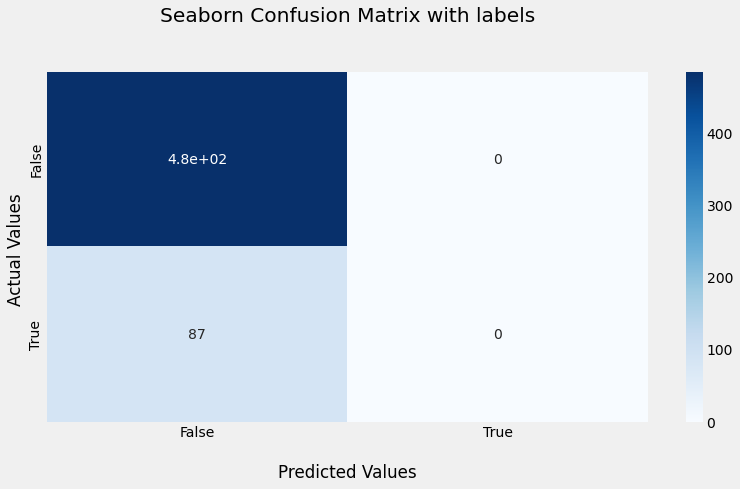

In [ ]:
#Predict the binary dependent variable using the model
lr_predicted_ = lr.predict(X_test)

#Create a confusion matrix
conf_matrix = confusion_matrix(y_test, lr_predicted_)
print("Confusion Matrix:")
print(conf_matrix)

true_neg, false_pos, false_neg, true_pos = conf_matrix.ravel()
# Visualizing Confusion Matrix with Heat Map
confusion_matrix_plot(conf_matrix)

In [ ]:
# #Predict the binary dependent variable using the model
# lr_predicted_ = best_estimator.predict(X_test)

# #Create a confusion matrix
# conf_matrix = confusion_matrix(y_test, lr_predicted_)
# print("Confusion Matrix:")
# print(conf_matrix)

# true_neg, false_pos, false_neg, true_pos = conf_matrix.ravel()
# # Visualizing Confusion Matrix with Heat Map
# confusion_matrix_plot(conf_matrix)

In [ ]:
#Predict the binary dependent variable using the model
lr_predicted_proba = lr.predict_proba(X_test)

In [ ]:
lr_predicted_proba

array([[0.64396172, 0.35603828],
       [0.62626383, 0.37373617],
       [0.67923555, 0.32076445],
       ...,
       [0.69713052, 0.30286948],
       [0.67701584, 0.32298416],
       [0.67681547, 0.32318453]])

In [ ]:
pred_class = [1 if lr_predicted_proba[i][1] >= 0.3 else 0 for i in range(lr_predicted_proba.shape[0])]

In [ ]:
# pred_class

Confusion Matrix:
[[158 327]
 [ 27  60]]


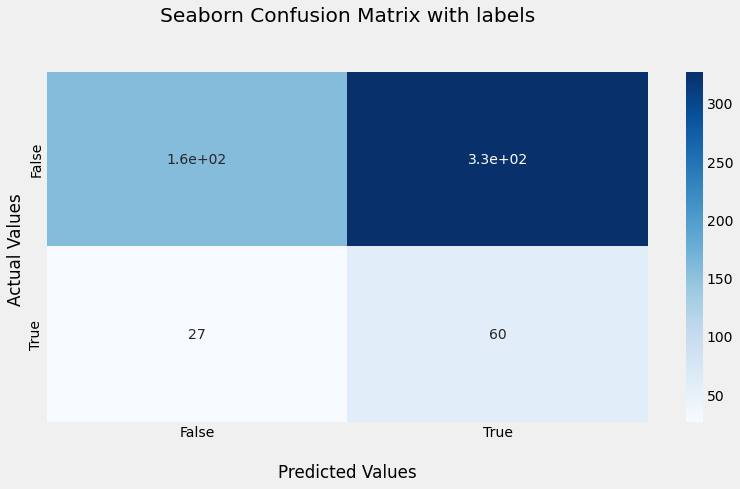

In [ ]:
#Create a confusion matrix
conf_matrix = confusion_matrix(y_test, pred_class)
print("Confusion Matrix:")
print(conf_matrix)

true_neg, false_pos, false_neg, true_pos = conf_matrix.ravel()

true_neg, false_pos, false_neg, true_pos = conf_matrix.ravel()
# Visualizing Confusion Matrix with Heat Map
confusion_matrix_plot(conf_matrix)

In [ ]:
Recall = (true_pos) / (true_pos + false_neg)
Recall

0.6896551724137931

In [ ]:
import xgboost as xgb

In [ ]:
# Define the parameter space to search
param_dist = {
    "n_estimators": [10, 100, 250, 500, 1000],
    "max_depth": [3, 4, 8, 12, 16],
    "learning_rate": np.arange(0.01, 1, 0.05),
    "min_child_weight": np.arange(1, 10),
    "subsample": np.arange(0.1, 1, 0.1),
    "gamma": np.arange(0, 1, 0.1),
    "colsample_bytree": np.arange(0.1, 1, 0.1),
}

In [ ]:
# Create the XGBoost classifier
xgb_clf = xgb.XGBClassifier()

In [ ]:
# Use RandomizedSearchCV to search the best parameters
random_search = RandomizedSearchCV(xgb_clf, param_distributions=param_dist, n_iter=1000, cv=5, scoring='recall')

In [ ]:
# Fit the random search on the data
random_search.fit(X, y)

# Get the best parameters
best_params = random_search.best_params_

# Get the best estimator
best_estimator = random_search.best_estimator_

In [ ]:
best_params

{'subsample': 0.1,
 'n_estimators': 1000,
 'min_child_weight': 2,
 'max_depth': 4,
 'learning_rate': 0.91,
 'gamma': 0.1,
 'colsample_bytree': 0.9}

In [ ]:
best_estimator

XGBClassifier(colsample_bytree=0.9, gamma=0.1, learning_rate=0.91, max_depth=4,
              min_child_weight=2, n_estimators=1000, subsample=0.1)

In [ ]:
xgb_clf = xgb.XGBClassifier(subsample=0.1, n_estimators=1000, min_child_weight=2,
                            max_depth=4, learning_rate=0.91, gamma=0.1, colsample_bytree=0.9)

xgb_clf = xgb_clf.fit(X_train, y_train)

Confusion Matrix:
[[429  56]
 [ 72  15]]


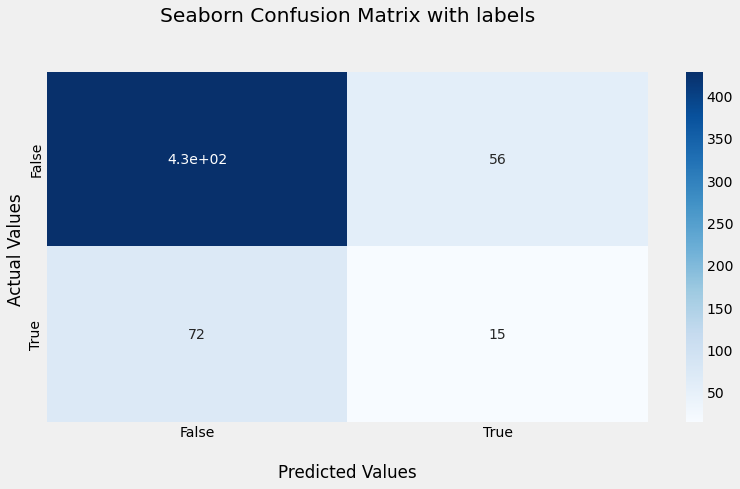

In [ ]:
#Predict the binary dependent variable using the model
xgb_predicted_ = xgb_clf.predict(X_test)

#Create a confusion matrix
conf_matrix = confusion_matrix(y_test, xgb_predicted_)
print("Confusion Matrix:")
print(conf_matrix)

true_neg, false_pos, false_neg, true_pos = conf_matrix.ravel()
# Visualizing Confusion Matrix with Heat Map
confusion_matrix_plot(conf_matrix)

In [ ]:
how # Recall = (true_pos) / (true_pos + false_neg)
# Recall

In [ ]:
#Predict the binary dependent variable using the model
xgb_predicted_proba = xgb_clf.predict_proba(X_test)

In [ ]:
xgb_predicted_proba

array([[0.9735085 , 0.02649154],
       [0.9296479 , 0.07035205],
       [0.94418645, 0.05581353],
       ...,
       [0.77199244, 0.22800757],
       [0.93013394, 0.06986608],
       [0.8173367 , 0.18266332]], dtype=float32)

In [ ]:
pred_class = [1 if xgb_predicted_proba[i][1] >= 0.15 else 0 for i in range(xgb_predicted_proba.shape[0])]

Confusion Matrix:
[[300 185]
 [ 37  50]]


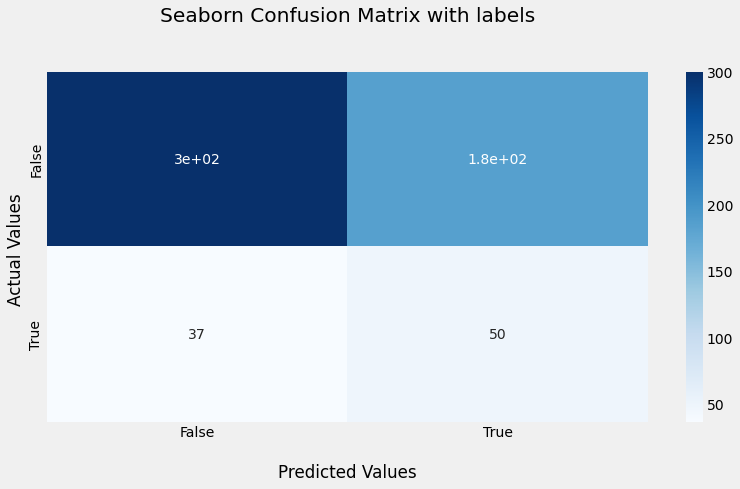

In [ ]:
#Create a confusion matrix
conf_matrix = confusion_matrix(y_test, pred_class)
print("Confusion Matrix:")
print(conf_matrix)

true_neg, false_pos, false_neg, true_pos = conf_matrix.ravel()

true_neg, false_pos, false_neg, true_pos = conf_matrix.ravel()
# Visualizing Confusion Matrix with Heat Map
confusion_matrix_plot(conf_matrix)

In [ ]:
Recall = (true_pos) / (true_pos + false_neg)
Recall

0.5747126436781609